<a href="https://colab.research.google.com/github/mosihan/UOB--Three-models-of-handwritten-digit-recognition/blob/main/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LR-first

In [ ]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


In [ ]:
import numpy as np
import pandas as pd

# Loading MINIST dataset
import tensorflow
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Vectoring: reshape 3d to 2d matrixes 
X_train=train_images.reshape(60000,-1)
X_test=test_images.reshape(10000,-1)
y_train=train_labels
y_test=test_labels

In [ ]:
import datetime
start = datetime.datetime.now()

from sklearn.linear_model import LogisticRegression

LR1 = LogisticRegression()
LR1.fit(X_train, y_train)

end = datetime.datetime.now()
print (end-start)

0:00:41.074707


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn import metrics
y_test_pred1=LR1.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred1,digits=4))

              precision    recall  f1-score   support

           0     0.9544    0.9827    0.9683       980
           1     0.9678    0.9797    0.9737      1135
           2     0.9297    0.8973    0.9132      1032
           3     0.9034    0.9069    0.9051      1010
           4     0.9343    0.9267    0.9305       982
           5     0.9034    0.8700    0.8864       892
           6     0.9430    0.9499    0.9464       958
           7     0.9314    0.9251    0.9283      1028
           8     0.8673    0.8922    0.8796       974
           9     0.9120    0.9138    0.9129      1009

    accuracy                         0.9255     10000
   macro avg     0.9247    0.9244    0.9244     10000
weighted avg     0.9255    0.9255    0.9254     10000



In [ ]:
print('Training accuracy = {0}%'.format(np.round(LR1.score(X_train, y_train) * 100, 2)))
print('Test accuracy = {0}%'.format(np.round(LR1.score(X_test, y_test) * 100, 2)))

Training accuracy = 93.39%
Test accuracy = 92.55%


Confusion matrix:
[[ 963    0    0    3    1    3    4    4    2    0]
 [   0 1112    4    2    0    1    3    2   11    0]
 [   3   10  926   15    6    4   15    8   42    3]
 [   4    1   21  916    1   26    3    9   22    7]
 [   1    1    7    3  910    0    9    7   10   34]
 [  11    2    1   33   11  776   11    6   35    6]
 [   9    3    7    3    7   16  910    2    1    0]
 [   1    6   24    5    7    1    0  951    3   30]
 [   8    7    6   23    6   26   10   10  869    9]
 [   9    7    0   11   25    6    0   22    7  922]]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

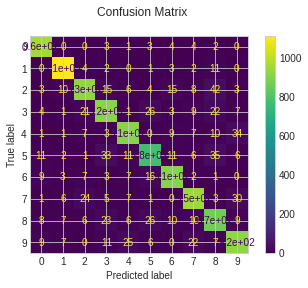

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
disp = metrics.plot_confusion_matrix(LR1, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

from google.colab import files
plt.savefig('LRConfusion-matrix.jpg')
files.download('LRConfusion-matrix.jpg')
plt.show()

#SVM-first

In [ ]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


In [ ]:
import numpy as np
import pandas as pd

# Loading MINIST dataset
import tensorflow
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Vectoring: reshape 3d to 2d matrixes 
X_train=train_images.reshape(60000,-1)
X_test=test_images.reshape(10000,-1)
y_train=train_labels
y_test=test_labels

In [ ]:
import datetime
start = datetime.datetime.now()

from sklearn import svm
svm1 = svm.SVC()
svm1.fit(X_train, y_train)

end = datetime.datetime.now()
print (end-start)

0:09:18.090091


In [ ]:
from sklearn import metrics
y_test_pred1 = svm1.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred1,digits=4))

              precision    recall  f1-score   support

           0     0.9799    0.9929    0.9863       980
           1     0.9886    0.9921    0.9903      1135
           2     0.9758    0.9748    0.9753      1032
           3     0.9745    0.9851    0.9798      1010
           4     0.9826    0.9786    0.9806       982
           5     0.9864    0.9765    0.9814       892
           6     0.9854    0.9854    0.9854       958
           7     0.9755    0.9689    0.9722      1028
           8     0.9714    0.9754    0.9734       974
           9     0.9719    0.9613    0.9666      1009

    accuracy                         0.9792     10000
   macro avg     0.9792    0.9791    0.9791     10000
weighted avg     0.9792    0.9792    0.9792     10000



Confusion matrix:
[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


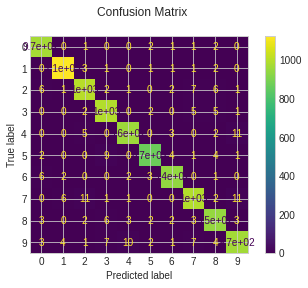

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
disp = metrics.plot_confusion_matrix(svm1, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

#BPNN-first

In [ ]:
%reset
%who

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Interactive namespace is empty.


In [ ]:
import numpy as np
import pandas as pd

# Loading MINIST dataset
import tensorflow
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Vectoring: reshape 3d to 2d matrixes 
X_train=train_images.reshape(60000,-1)
X_test=test_images.reshape(10000,-1)
y_train=train_labels
y_test=test_labels

In [ ]:
import datetime
start = datetime.datetime.now()

from sklearn.neural_network import MLPClassifier
bpnn1 = MLPClassifier()
bpnn1.fit(X_train, y_train)

end = datetime.datetime.now()
print (end-start)

0:03:29.453655


In [ ]:
from sklearn import metrics
y_test_pred1 = bpnn1.predict(X_test)
print(metrics.classification_report(y_test, y_test_pred1,digits=4))

              precision    recall  f1-score   support

           0     0.9719    0.9878    0.9798       980
           1     0.9877    0.9877    0.9877      1135
           2     0.9579    0.9700    0.9639      1032
           3     0.9438    0.9644    0.9540      1010
           4     0.9615    0.9664    0.9639       982
           5     0.9633    0.9428    0.9530       892
           6     0.9718    0.9729    0.9724       958
           7     0.9707    0.9660    0.9683      1028
           8     0.9682    0.9363    0.9520       974
           9     0.9554    0.9544    0.9549      1009

    accuracy                         0.9654     10000
   macro avg     0.9652    0.9649    0.9650     10000
weighted avg     0.9655    0.9654    0.9654     10000

